## UNDERSTANDING THE INDIAN STARTUP ECOSYSTEM.

## DESCRIPTION
    A deep analysis to assess the hypothesis that the type of funding received by a startup venture in the indian startup ecosystem is influenced by the sector from which it belongs. 

## HYPOTHESIS
    Null Hypothesis: There is no relationship between the sector a startup belongs to and the type of funding received. 
     
    Alternarte Hypothesis: There is a relationship between the sector a startup belongs to and the type of funding received.

## RESEARCH QUESTIONS
1. What are the growing sectors in the Indian Startup Eco-system in terms of:
    i.number of start-ups
    ii.The funding received 
2. i. What types of funding stages are available in the Indian Startup Eco-System,
   ii.How much median funding do the top stages receive (in terms of value count of the stages) 
3. i.Which Locations have the highest number of Companies established,
   ii.which Locations have the highest funding received
4. How much funding was distrubted across the years(in median value) ?
5. Is there a relationship between the sector and the funding stages ?

# Importation

In [1]:
# Data handling
import pandas as pd
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import seaborn as sns


# Data Loading

In [2]:
df_18=pd.read_csv('csv_files/startup_funding2018.csv')
df_19=pd.read_csv('csv_files/startup_funding2019.csv') 
df_20=pd.read_csv('csv_files/startup_funding2020.csv') 
df_21=pd.read_csv('csv_files/startup_funding2021.csv')

# Dataset Overview

## 2018 Dataset 

In [3]:
df_18.info()
df_18.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


## 2019 Dataset

In [4]:
df_19.info()
df_19.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


## 2020 Dataset

In [5]:
df_20.info()
df_20.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN


## 2021 Dataset

In [6]:
df_21.info()
df_21.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


# Feature Processing


## Processing 2018 Dataset

### Issues Identified

1. There were missing columns compared to the other datasets
2. The Amount column had both Ruppee and USD Currency
3. The some column names were labelled differently 
4. Some companies had not disclosed the funding amount

### How To Handle Issues Identified

1. We added the missing columns
2. We converted the Indian Rupee Amounts to USD Dollar according to the exchange rate in 2018
3. Renamed and rearranged the columns to be similar to data in the other CSVs

In [7]:
#Added missing columns in the 2018 Data
df_18 ["Founded"] = " "
df_18 ["Investor"] = " " 
df_18 ["Founders"] = " "

df_18

,Company Name,Industry,Round/Series,Amount,Location,About Company,Founded,Investor,Founders
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",,,
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,,,
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,,,
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,,,
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,,,
...,...,...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",,,
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,,,
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,,,
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,,,


In [8]:
#Renamed the columns so that they are uniform
df_18.rename(columns = {"Company Name":"Company/Brand","About Company":"What it does","Round/Series":"Stage",
                        "Industry":"Sector","Location":"HeadQuarter","Amount":"Amount($)"}, inplace=True)

In [9]:
df_18

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founded,Investor,Founders
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",,,
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,,,
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,,,
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,,,
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,,,
...,...,...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",,,
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,,,
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,,,
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,,,


In [10]:
#Rearranged the data so that they are uniform
df_18.iloc[:,[0,6,4,1,5,8,7,3,2]]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,TheCollegeFever,,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",,,250000,Seed
1,Happy Cow Dairy,,"Mumbai, Maharashtra, India","Agriculture, Farming",A startup which aggregates milk from dairy far...,,,"₹40,000,000",Seed
2,MyLoanCare,,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,,,"₹65,000,000",Series A
3,PayMe India,,"Noida, Uttar Pradesh, India","Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,,,2000000,Angel
4,Eunimart,,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,,,—,Seed
...,...,...,...,...,...,...,...,...,...
521,Udaan,,"Bangalore, Karnataka, India","B2B, Business Development, Internet, Marketplace","Udaan is a B2B trade platform, designed specif...",,,225000000,Series C
522,Happyeasygo Group,,"Haryana, Haryana, India","Tourism, Travel",HappyEasyGo is an online travel domain.,,,—,Series A
523,Mombay,,"Mumbai, Maharashtra, India","Food and Beverage, Food Delivery, Internet",Mombay is a unique opportunity for housewives ...,,,7500,Seed
524,Droni Tech,,"Mumbai, Maharashtra, India",Information Technology,Droni Tech manufacture UAVs and develop softwa...,,,"₹35,000,000",Seed


In [11]:
# Cleaning the Amounts column
## Removing the commas and dashes from the Amounts
df_18['Amount($)'] = df_18['Amount($)'].apply(str)
df_18['Amount($)'].replace(",", "", inplace = True, regex=True)
df_18['Amount($)'].replace("—", 0, inplace = True, regex=True)
df_18['Amount($)'].replace("$", "", inplace = True, regex=True)

In [12]:
## Creating temporary columns to help with the conversion of INR to USD
df_18['INR Amount'] = df_18['Amount($)'].str.rsplit('₹', n = 2).str[1]
df_18['INR Amount'] = df_18['INR Amount'].apply(float).fillna(0)
df_18['USD Amount'] = df_18['INR Amount'] * 0.0146
df_18['USD Amount'] = df_18['USD Amount'].replace(0, np.nan)
df_18['USD Amount'] = df_18['USD Amount'].fillna(df_18['Amount($)'])
df_18['USD Amount'] = df_18['USD Amount'].replace("$", "", regex=True)
df_18["Amount($)"] = df_18["USD Amount"]
df_18["Amount($)"] = df_18["Amount($)"].apply(lambda x: float(str(x).replace("$","")))
df_18["Amount($)"] = df_18["Amount($)"].replace(0, np.nan)

In [13]:
# Dropping the temporary columns
df_18.drop(columns = ["INR Amount", "USD Amount"], inplace = True)

In [14]:
#Equating similar entries in the HQ column
df_18['HeadQuarter'].replace("Bangalore, Karnataka, India", "Bangalore", inplace = True, regex=True)
df_18['HeadQuarter'].replace("Mumbai, Maharashtra, India", "Mumbai", inplace = True, regex=True)
df_18['HeadQuarter'].replace("Gurgaon, Haryana, India", "Gurgaon", inplace = True, regex=True)
df_18['HeadQuarter'].replace("Noida, Uttar Pradesh, India", "Noida", inplace = True, regex=True)
df_18['HeadQuarter'].replace("Delhi, Delhi, India", "Delhi", inplace = True, regex=True)
df_18['HeadQuarter'].replace("Chennai, Tamil Nadu, India", "Chennai", inplace = True, regex=True)
df_18['HeadQuarter'].replace("Mohali, Punjab, India", "Mohali", inplace = True, regex=True)
df_18['HeadQuarter'].replace("Kolkata, West Bengal, India", "Kolkata", inplace = True, regex=True)
df_18['HeadQuarter'].replace("Pune, Maharashtra, India", "Pune", inplace = True, regex=True)
df_18['HeadQuarter'].replace("Jodhpur, Rajasthan, India", "Jodhpur", inplace = True, regex=True)
df_18['HeadQuarter'].replace("Ahmedabad, Gujarat, India", "Ahmedabad", inplace = True, regex=True)
df_18['HeadQuarter'].replace("Azadpur, Delhi, India", "Azadpur", inplace = True, regex=True)
df_18['HeadQuarter'].replace("Haryana, Haryana, India", "Haryana", inplace = True, regex=True)
df_18['HeadQuarter'].replace("Cochin, Kerala, India", "Cochin", inplace = True, regex=True)
df_18['HeadQuarter'].replace("Faridabad, Haryana, India", "Faridabad", inplace = True, regex=True)
df_18['HeadQuarter'].replace("Jaipur, Rajasthan, India", "Jaipur", inplace = True, regex=True)
df_18['HeadQuarter'].replace("Bengaluru, Karnataka, India", "Bengaluru", inplace = True, regex=True)
df_18['HeadQuarter'].replace("Hyderabad, Andhra Pradesh, India", "Hyderabad", inplace = True, regex=True)

In [15]:
df_18.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founded,Investor,Founders
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",,,
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,,,
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,,,
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,,,
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,,,


In [16]:
# Adding a column to represent the year of the data
df_18["Data Year"] = "2018"
df_18.head(10)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founded,Investor,Founders,Data Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",,,,2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,,,,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,,,,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,,,,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,,,,2018
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000.0,Bengaluru,Hasura is a platform that allows developers to...,,,,2018
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,233600.0,"Kalkaji, Delhi, India",Tripshelf is an online market place for holida...,,,,2018
7,Hyperdata.IO,Market Research,Angel,730000.0,Hyderabad,Hyperdata combines advanced machine learning w...,,,,2018
8,Freightwalla,"Information Services, Information Technology",Seed,NaN,Mumbai,Freightwalla is an international forwarder tha...,,,,2018
9,Microchip Payments,Mobile Payments,Seed,NaN,Bangalore,Microchip payments is a mobile-based payment a...,,,,2018


In [17]:
#Writing the Dataframe into a CSV file to see the data outlook
df_18.to_csv('startup_funding2018final.csv', index=False)

## Processing 2019 Dataset 

### Issues Identified

1. Some companies had not disclosed the funding amount
2. There are some missing data in the Founded, Stage and HeadQuarter columns

### How To Handle Issues Identified 

1. In the Amount Column we changed the Undisclosed to NaN

In [18]:
# Converting the Founded column to a string 
df_19['Founded'] = df_19['Founded'].apply(str)

In [19]:
# Removing the commas and dashes from the Amounts
df_19["Amount($)"] = df_19["Amount($)"].apply(str)
df_19["Amount($)"].replace(",", "", inplace = True, regex=True)
df_19["Amount($)"].replace("Undisclosed", np.nan, inplace = True, regex=True)
df_19["Amount($)"] = df_19["Amount($)"].apply(lambda x: float(str(x).replace("$","")))
df_19["Founded"].replace("nan", np.nan, inplace = True, regex=True)

In [20]:
# Adding a column to represent the year of the data
df_19["Data Year"] = "2019"
df_19

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Data Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019
...,...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...",20000000.0,Series A,2019
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...",693000000.0,NaN,2019
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,5000000.0,Series B,2019
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...",50000000.0,NaN,2019


In [21]:
#Writing the Dataframe into a CSV file to see the data outlook
df_19.to_csv('startup_funding2019final.csv', index=False)

## Processing 2020 Dataset 

### Issues Identified

1. There are missing data in the Columns for Stage, Founded and HeadQuarter
2. In the amount column there is more than two values in the same cell
3. There was an additional cell without any data
4. The amount column had several Undisclosed entries

### How To Handle Issues Identified

1. We will delete the aditional cell
2. The cells with more than one data in Amount Column we made it NaN
3. In the Amount column we made the data to be the same and we changed Undisclosed to NaN

In [22]:
# Dropping the last empty column 
df_20.drop(columns=['Unnamed: 9'], inplace = True)

In [23]:
# Removing the commas and dashes from the Amounts
df_20["Amount($)"] = df_20["Amount($)"].apply(str)
df_20["Amount($)"].replace(",", "", inplace = True, regex=True)
df_20["Amount($)"].replace("Undisclosed", np.nan, inplace = True, regex=True)
df_20["Amount($)"].replace("Undiclsosed", np.nan, inplace = True, regex=True)
df_20["Amount($)"].replace("Undislosed", np.nan, inplace = True, regex=True)
df_20["Amount($)"].replace("nan", np.nan, inplace = True, regex=True)

In [24]:
df_20.loc[(df_20["Company/Brand"] == "True Balance")&(df_20["Sector"] == "Finance") , ["Amount($)"]] = [np.nan]
df_20.loc[df_20["Company/Brand"] == "True Balance"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
136,True Balance,2014,Gurugram,FinTech,True Balance is a digital wallet that enables ...,"Cheolwon Lee, Jay Yi, Martin Lee","IBK Capital, SB Partners",$28000000,NaN
465,True Balance,2014,Gurugram,Finance,Earn money by meeting financial needs of your ...,"Charlie, Jay, Martin",Balancehero,NaN,Series C


In [25]:
df_20.loc[(df_20["Company/Brand"] == "Eruditus") , ["Amount($)"]] = [np.nan]
df_20.loc[df_20["Company/Brand"] == "Eruditus"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
472,Eruditus,2010,Mumbai,Education,Bring world-class business and professional ed...,"Chaitanya Kalipatnapu, Ashwin Damera","Bertelsmann India Investments, Sequoia Capital...",NaN,NaN


In [26]:
# Removing the $ signs and converting the Amount column to float
df_20["Amount($)"] = df_20["Amount($)"].apply(lambda x: float(str(x).replace("$","")))

In [27]:
# Adding a column to represent the year of the data
df_20["Data Year"] = "2020"
df_20.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Data Year
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,NaN,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,NaN,2020


In [28]:
#Writing the Dataframe into a CSV file to see the data outlook
df_20.to_csv('startup_funding2020final.csv', index=False)

## Processing 2021 Dataset 

### Issues Identified

1. Some columns have missing data, i.e. HeadQuarter, Stage and Founded
2. Some Cells had their information stored in the wrong column
3. We identified several duplicate cells
4. Some of the Data in Amount Column have '$' sign whiles others are missing the sign

### How To Handle Issues Identified

1. We will rearrnage the data that has been placed in the wrong cells
2. Deletion of Duplicate Cells
3. We will make all the values in the amount column to be similar in structure

In [29]:
# Converting the Founded column to a string 
df_21['Founded'] = df_21['Founded'].apply(str)

In [30]:
# Adding a column to represent the year of the data
df_21["Data Year"] = "2021"
df_21.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Data Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021


In [31]:
# Removing the commas and dashes from the Amounts
df_21["Amount($)"] = df_21["Amount($)"].apply(str)
df_21["Amount($)"].replace(",", "", inplace = True, regex=True)
df_21["Amount($)"].replace("Undisclosed", np.nan, inplace = True, regex=True)
df_21["Amount($)"].replace("Undiclsosed", np.nan, inplace = True, regex=True)
df_21["Amount($)"].replace("Undislosed", np.nan, inplace = True, regex=True)
df_21["Amount($)"].replace("undisclosed", np.nan, inplace = True, regex=True)
df_21["Amount($)"].replace("nan", np.nan, inplace = True, regex=True)

In [32]:
df_21.loc[df_21["Company/Brand"] == "FanPlay", ["Amount($)", "Stage", "Investor"]] = [1200000, "Series A", "Upsparks"]
df_21.loc[df_21["Company/Brand"] == "FanPlay"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Data Year
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,Upsparks,1200000,Series A,2021
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,Upsparks,1200000,Series A,2021


In [33]:
df_21.drop([111], axis = 0, inplace = True)

In [34]:
df_21.loc[df_21["Company/Brand"] == "Fullife Healthcare", ["Amount($)", "Stage", "Investor"]] = [22000000, "Series C", "Morgan Stanley Private Equity Asia"]
df_21.drop([256], axis = 0, inplace = True)


In [35]:
df_21.loc[df_21["Company/Brand"]  == "Fullife Healthcare"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Data Year
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,Morgan Stanley Private Equity Asia,22000000,Series C,2021


In [36]:
# Correcting the data
df_21.loc[df_21["Amount($)"] == "Seed"]

df_21.loc[df_21["Company/Brand"] == "MoEVing", ["Amount($)", "Stage", "Investor"]] = [5000000, "Seed", np.nan]

df_21.loc[df_21["Company/Brand"] == "Godamwale", ["Amount($)", "Stage", "Investor"]] = [1000000, "Seed", "Anand Aryamane"]

In [37]:
#Correcting the data
df_21.loc[df_21["Amount($)"] == "ah! Ventures"]

df_21.loc[df_21["Company/Brand"] == "Little Leap", ["Amount($)", "Stage", "Investor"]] = [300000, "Seed", "ah! Ventures"]


In [38]:
#Correcting the data
df_21.loc[df_21["Amount($)"] == "Pre-series A"]

df_21.loc[df_21["Company/Brand"] == "AdmitKard", ["Amount($)", "Stage", "Investor"]] = [1000000, "Pre-series A", np.nan]


In [39]:
#Correcting the data
df_21.loc[df_21["Amount($)"] == "JITO Angel Network, LetsVenture"]

df_21.loc[df_21["Company/Brand"] == "Saarthi Pedagogy", ["Amount($)", "Stage", "Investor"]] = [1000000, "Seed","JITO Angel Network, LetsVenture"]


In [40]:
#Correcting the data
df_21.loc[df_21["Amount($)"] == "ITO Angel Network, LetsVenture"]

df_21.loc[df_21["Company/Brand"] == "BHyve", ["Amount($)", "Stage", "Investor"]] = [300000, "Seed","ITO Angel Network, LetsVenture"]

In [41]:
#Correcting the data
df_21.loc[df_21["Stage"] == "$6000000"]

df_21.loc[df_21["Stage"] == "$6000000", ["Amount($)", "Stage"]] = [6000000, np.nan]

In [42]:
#Cleaning the amount column and making the data to be uniform
df_21["Amount($)"].replace('', 0, inplace = True, regex=True)
df_21["Amount($)"] = df_21["Amount($)"].apply(lambda x: str(x).replace("$",""))
df_21["Amount($)"].replace('nan', 0, inplace = True, regex=True)
df_21["Amount($)"] = pd.to_numeric(df_21["Amount($)"])
df_21["Amount($)"] = df_21["Amount($)"].apply(float)

In [43]:
df_21.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Data Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,NaN,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,2021


In [44]:
#Writing the Dataframe into a CSV file to see the data outlook
df_21.to_csv('startup_funding2021final.csv', index=False)

In [45]:
#Reading the file path
Files = sorted(glob(r'C:\Users\Admin\Desktop\C_A\startup_funding*.csv'))
Files

['C:\\Users\\Admin\\Desktop\\C_A\\startup_funding2018final.csv',
 'C:\\Users\\Admin\\Desktop\\C_A\\startup_funding2019final.csv',
 'C:\\Users\\Admin\\Desktop\\C_A\\startup_funding2020final.csv',
 'C:\\Users\\Admin\\Desktop\\C_A\\startup_funding2021final.csv']

In [46]:
#Combining the files in the folder. The for function is interating all the files in the folder
df = pd.concat([pd.read_csv(f) for f in Files], ignore_index=True)
df.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founded,Investor,Founders,Data Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",,,,2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,,,,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,,,,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,,,,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,,,,2018


In [47]:
#Saving the Final DataFrame into a CSV. This will be the data that we will process 
df.to_csv('Final.csv', index=False)

# Exploratory Data Analysis

    1. Check for Duplicate Data
    2. Check the Column Data Types
    3. How many null values are in the final data

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2877 entries, 0 to 2876
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2877 non-null   object 
 1   Sector         2859 non-null   object 
 2   Stage          1943 non-null   object 
 3   Amount($)      2465 non-null   float64
 4   HeadQuarter    2763 non-null   object 
 5   What it does   2877 non-null   object 
 6   Founded        2635 non-null   object 
 7   Investor       2775 non-null   object 
 8   Founders       2858 non-null   object 
 9   Data Year      2877 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 224.9+ KB


In [49]:
#Checking the total number of duplicate information
df.duplicated().sum()

21

In [50]:
#removing the non_numeric value
df['Amount($)']=pd.to_numeric(df['Amount($)'])

In [51]:
# Using DataFrame.drop_duplicates() to keep first duplicate row
df = df.drop_duplicates(keep='first')

In [52]:
#Counting how many cells have a Nan Variable
df['Amount($)'].isnull().sum()

411

In [53]:
#Replacing the Nan Variable in the Amount($) Column with 0
df["Amount($)"] = df["Amount($)"].replace(np.nan, 0)

In [54]:
#cleaning up the Year Founded Column
df["Founded"].replace("-","nan", inplace = True) # Replacing dashes with nan
df["Founded"] = df["Founded"].apply(lambda x: str(x).replace(".0","")) # Removing .0 attached

In [55]:
df["Stage"].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round', nan, 'Fresh funding',
       'Pre series A', 'Series G', 'Post series A', 'Seed funding',
       'Seed fund', 'Series F', 'Series B+', 'Seed round', 'Pre-series A',
       'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C', 'Pre-series B',
       'Bridge', 'Series B2', 'Pre- series A', 'Edge', 'Pre-Series B',
       'Seed A', 'Series A-1', 'Seed Funding', 'Pre-seed Round',
       'Seed Round & Series A', 'Pre Series A', 'Pre seed Round',
       'Angel Round', 'Pre series A1', 'Series E2', 'Seed Round',
       'Bridge Round', 'Pre seed

## univeriate analysis

In [56]:
with pd.option_context('display.max_rows',None,):
    print(df)

                                          Company/Brand  \
0                                       TheCollegeFever   
1                                       Happy Cow Dairy   
2                                            MyLoanCare   
3                                           PayMe India   
4                                              Eunimart   
5                                                Hasura   
6                                             Tripshelf   
7                                          Hyperdata.IO   
8                                          Freightwalla   
9                                    Microchip Payments   
10                           BizCrum Infotech Pvt. Ltd.   
11                                              Emojifi   
12                                                Flock   
13                                            Freshboxx   
14                           Wide Mobility Mechatronics   
15                                              Pitstop 

In [57]:
#Aligning the Stages to be uniform
df.loc[df["Stage"]=="Angel Round","Stage"]="Angel"
df.loc[df["Stage"]=="Series B2","Stage"]="Series B"
df.loc[df["Stage"]=="Series B3","Stage"]="Series B"
df.loc[df["Stage"]=="Series A+","Stage"]="Series A"
df.loc[df["Stage"]=="Series F2","Stage"]="Series F"      
df.loc[df["Stage"]=="Series C, D","Stage"]="Series C"
df.loc[df["Stage"]=="Series E2","Stage"]="Series E"
df.loc[df["Stage"]=="Seed Round & Series A ","Stage"]="Seed"
df.loc[df["Stage"]=="Series B+","Stage"]="Series B"      
df.loc[df["Stage"]=="Series A-1 ","Stage"]="Series A"
df.loc[df["Stage"]=="Series F1","Stage"]="Series F"      
df.loc[df["Stage"]=="Venture - Series Unknown ","Stage"]="Venture"
df.loc[df["Stage"] == "$6000000", "Stage"] = "Venture"
df.loc[df["Stage"] == "Debt Financing", "Stage"] = "Debt"
df.loc[df["Stage"] == "Early seed", "Stage"] = "Seed"
df.loc[df["Stage"] == "Fresh Funding", "Stage"] = "Seed"
df.loc[df["Stage"] == "Fresh funding", "Stage"] = "Seed"
df.loc[df["Stage"] == "nan", "Stage"] = "Undisclosed"
df.loc[df["Stage"] == "PE", "Stage"] = "Private Equity"
df.loc[df["Stage"] == "Pre seed", "Stage"] = "Pre-seed"
df.loc[df["Stage"] == "Pre series A1", "Stage"] = "Pre-series A"
df.loc[df["Stage"] == "Pre- series A", "Stage"] = "Pre-series A"
df.loc[df["Stage"] == "Pre-Series A", "Stage"] = "Pre-series A"
df.loc[df["Stage"] == "Pre-Series A1", "Stage"] = "Pre-series A"
df.loc[df["Stage"] == "Seed fund", "Stage"] = "Seed"
df.loc[df["Stage"] == "Seed funding", "Stage"] = "Seed"
df.loc[df["Stage"] == "Seed Funding", "Stage"] = "Seed"
df.loc[df["Stage"] == "Seies A", "Stage"] = "Series A"
df.loc[df["Stage"] == "Series A2", "Stage"] = "Series A"
df.loc[df["Stage"] == "Series I", "Stage"] = "Series A"
df.loc[df["Stage"] == "Pre Series A", "Stage"] = "Pre-series A"
df.loc[df["Stage"] == "Pre series A", "Stage"] = "Pre-series A"
df.loc[df["Stage"] == "Pre series B", "Stage"] = "Pre-series B"
df.loc[df["Stage"] == "Pre series C", "Stage"] = "Pre-series C"
df.loc[df["Stage"] == "Pre-Seed", "Stage"] = "Pre-seed"
df.loc[df["Stage"] == "Pre-series A1", "Stage"] = "Pre-series A"
df.loc[df["Stage"] == "Seed & Series A", "Stage"] = "Series A"
df.loc[df["Stage"] == "Seed A", "Stage"] = "Series A"
df.loc[df["Stage"] == "Seed Investment", "Stage"] = "Seed"
df.loc[df["Stage"] == "Seed+", "Stage"] = "Seed"
df.loc[df["Stage"] == "Pre-Series B", "Stage"] = "Pre-series B"
df.loc[df["Stage"]=="https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593","Stage"]=np.nan
df.loc[df["Stage"]=="Seed Round","Stage"]="Seed"
df.loc[df["Stage"]=="Seed round","Stage"]="Seed"
df.loc[df["Stage"]=="Pre seed round","Stage"]="Pre-seed"
df.loc[df["Stage"]=="Pre-seed Round","Stage"]="Pre-seed"
df.loc[df["Stage"]=="Undisclosed","Stage"]=np.nan
df.loc[df["Stage"]=="Corporate Round","Stage"]="Corporate"
df.loc[df["Stage"]=="Bridge Round","Stage"]="Bridge"
df.loc[df["Stage"]=="Series A-1","Stage"]="Series A"
df.loc[df["Stage"]=="Seed Round & Series A","Stage"]="Series A"
df.loc[df["Stage"]=="Post series A","Stage"]="Series A"
df.loc[df["Stage"]=="Pre seed Round","Stage"]="Pre-seed"

In [58]:
# Chnging the Sector Information to make it uniform
df.loc[df["Sector"] == "Credit, Financial Services, Lending, Marketplace", "Sector"] = "Financial services"
df.loc[df["Sector"] == "Financial Services, FinTech", "Sector"] = "Financial services"
df.loc[df["Sector"] == "E-Commerce Platforms, Retail, SaaS", "Sector"] = "E-commerce"
df.loc[df["Sector"] == "B2B, Shoes", "Sector"] = "B2b"
df.loc[df["Sector"] == "Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing", "Sector"] = "Marketing"
df.loc[df["Sector"] == "Accomodation", "Sector"] = "Housing & real estate"
df.loc[df["Sector"] == "Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat", "Sector"] = "Software"
df.loc[df["Sector"] == "Automotive, Search Engine, Service Industry", "Sector"] = "Automobiles & Automotives"
df.loc[df["Sector"] == "Accounting", "Sector"] = "Financial services"
df.loc[df["Sector"] == "Cloud Infrastructure, PaaS, SaaS", "Sector"] = "Cloud computing"
df.loc[df["Sector"] == "Internet, Leisure, Marketplace", "Sector"] = "E-Commerce"
df.loc[df["Sector"] == "Information Services, Information Technology", "Sector"] = "Information Technology"
df.loc[df["Sector"] == "Finance, Internet, Travel", "Sector"] = "Travel & Transport"
df.loc[df["Sector"] == "Accounting, Business Information Systems, Business Travel, Finance, SaaS", "Sector"] = "Financial services"
df.loc[df["Sector"] == "Artificial Intelligence, Product Search, SaaS, Service Industry, Software", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "Internet of Things, Waste Management", "Sector"] = "IoT"
df.loc[df["Sector"] == "Agriculture, Analytics, Big Data, Farming", "Sector"] = "AgriTech"
df.loc[df["Sector"] == "Air Transportation, Freight Service, Logistics, Marine Transportation", "Sector"] = "Aviation"
df.loc[df["Sector"] == "Enterprise Software, Health Care, Hospital, Parenting, Personal Health, SaaS", "Sector"] = "Healthcare"
df.loc[df["Sector"] == "E-Commerce, Fashion, Jewelry, Retail", "Sector"] = "E-Commerce"
df.loc[df["Sector"] == "Blockchain, Developer Tools, Enterprise Software", "Sector"] = "Software"
df.loc[df["Sector"] == "Automotive, Marketplace, Online Portals", "Sector"] = "Automotive"
df.loc[df["Sector"] == "Internet of Things, Telecommunications", "Sector"] = "IoT"
df.loc[df["Sector"] == "Food and Beverage, Food Delivery, Snack Food", "Sector"] = "Food and Beverage"
df.loc[df["Sector"] == "Logistics, Supply Chain Management", "Sector"] = "Logistics"
df.loc[df["Sector"] == "Information Technology, Logistics, Supply Chain Management", "Sector"] = "Logistics"
df.loc[df["Sector"] == "Industrial Automation, Logistics, Supply Chain Management", "Sector"] = "Logistics"
df.loc[df["Sector"] == "Advertising, marketing & sales", "Sector"] = "Advertising"
df.loc[df["Sector"] == "E-Learning, Education", "Sector"] = "Education"
df.loc[df["Sector"] == "Clean Energy, CleanTech, Laundry and Dry-cleaning", "Sector"] = "CleanTech"
df.loc[df["Sector"] == "E-Commerce, Fashion, Mobile", "Sector"] = "E-Commerce"
df.loc[df["Sector"] == "Apps, Messaging, Navigation, Public Safety", "Sector"] = "Apps"
df.loc[df["Sector"] == "Financial Services, Lending", "Sector"] = "Financial services"
df.loc[df["Sector"] == "Fitness, Health Care, Wellness", "Sector"] = "HealthCare"
df.loc[df["Sector"] == "Artificial Intelligence, Machine Learning, SaaS, Virtual Assistant", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "3D Printing, Manufacturing, Product Design", "Sector"] = "Manufacturing"
df.loc[df["Sector"] == "Accounting, Apps, FinTech", "Sector"] = "Accounting"
df.loc[df["Sector"] == "Accounting, Banking, Finance", "Sector"] = "Accounting"
df.loc[df["Sector"] == "Accounting, Business Information Systems, Business Travel, Finance, SaaS", "Sector"] = "Accounting"
df.loc[df["Sector"] == "Advertising, Artificial Intelligence, Digital Media, iOS, Location Based Services, News, Video, Video on Demand, Video Streaming", "Sector"] = "Advertising"
df.loc[df["Sector"] == "Advertising, Consulting, Digital Marketing", "Sector"] = "Advertising"
df.loc[df["Sector"] == "Advertising, Human Resources, Marketing", "Sector"] = "Advertising"
df.loc[df["Sector"] == "Advertising, Internet, Marketing", "Sector"] = "Advertising"
df.loc[df["Sector"] == "Agriculture, AgTech, Artificial Intelligence, Internet of Things, Machine Learning", "Sector"] = "AgriTech"
df.loc[df["Sector"] == "Agriculture, AgTech, Manufacturing", "Sector"] = "AgriTech"
df.loc[df["Sector"] == "Agriculture, Analytics, Big Data, Farming", "Sector"] = "AgriTech"
df.loc[df["Sector"] == "Agriculture, Farmers Market, Farming", "Sector"] = "AgriTech"
df.loc[df["Sector"] == "Agriculture, Farming", "Sector"] = "AgriTech"
df.loc[df["Sector"] == "Agriculture, Mobile", "Sector"] = "AgriTech"
df.loc[df["Sector"] == "AgTech, B2B, Supply Chain Management", "Sector"] = "AgriTech"
df.loc[df["Sector"] == "Air Transportation, Freight Service, Logistics, Marine Transportation", "Sector"] = "AgriTech"
df.loc[df["Sector"] == "Alternative Medicine, Health Care", "Sector"] = "HealthCare"
df.loc[df["Sector"] == "Analytics, Apps, Market Research", "Sector"] = "Analytics"
df.loc[df["Sector"] == "Analytics, Audio, Digital Media, Innovation Management, Internet Radio, Media and Entertainment", "Sector"] = "Analytics"
df.loc[df["Sector"] == "Analytics, Computer Vision, Enterprise Software, Machine Learning, Natural Language Processing, Speech Recognition", "Sector"] = "Analytics"
df.loc[df["Sector"] == "Analytics, CRM, Loyalty Programs, Machine Learning, Marketing Automation, Retail Technology, SaaS, Small and Medium Businesses", "Sector"] = "Analytics"
df.loc[df["Sector"] == "Android, Big Data, Blockchain, Cloud Computing, EdTech, Education, Information Technology, iOS, Training, Web Development", "Sector"] = "Education"
df.loc[df["Sector"] == "Analytics", "Sector"] = "Analytics"
df.loc[df["Sector"] == "Apps, Audio", "Sector"] = "Apps"
df.loc[df["Sector"] == "Apps, B2B, Freight Service, Logistics, SaaS, Shipping, Supply Chain Management, Transportation", "Sector"] = "Apps"
df.loc[df["Sector"] == "Apps, Beauty, Consumer, Retail", "Sector"] = "Apps"
df.loc[df["Sector"] == "Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat", "Sector"] = "Apps"
df.loc[df["Sector"] == "Apps, E-Commerce, Internet", "Sector"] = "Apps"
df.loc[df["Sector"] == "Apps, E-Commerce, Internet, Mobile, Ride Sharing, Transportation", "Sector"] = "Apps"
df.loc[df["Sector"] == "Apps, Education, Retail", "Sector"] = "Apps"
df.loc[df["Sector"] == "Apps, Events, News", "Sector"] = "Apps"
df.loc[df["Sector"] == "Apps, Financial Services, FinTech", "Sector"] = "Apps"
df.loc[df["Sector"] == "Apps, Fitness, Health Care, mHealth", "Sector"] = "Apps"
df.loc[df["Sector"] == "Apps, Health Care, Hospital, Mobile Apps", "Sector"] = "Apps"
df.loc[df["Sector"] == "Apps, Health Care, Internet, Mobile Apps, Personal Health", "Sector"] = "Apps"
df.loc[df["Sector"] == "Apps, Health Care, Pharmaceutical", "Sector"] = "Apps"
df.loc[df["Sector"] == "Apps, Home Services, Information Services, Information Technology", "Sector"] = "Apps"
df.loc[df["Sector"] == "Apps, Information Services, Information Technology", "Sector"] = "Apps"
df.loc[df["Sector"] == "Apps, Messaging, Navigation, Public Safety", "Sector"] = "Apps"
df.loc[df["Sector"] == "Apps, Mobile, Mobile Apps, Software", "Sector"] = "Apps"
df.loc[df["Sector"] == "Apps, Mobile, Transportation", "Sector"] = "Apps"
df.loc[df["Sector"] == "Apps, Payments, Retail", "Sector"] = "Apps"
df.loc[df["Sector"] == "Artificial Intelligence, Business Intelligence, Industrial Automation, Machine Learning", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "Artificial Intelligence, Cloud Computing, Video", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "Artificial Intelligence, Computer, Machine Learning", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "Artificial Intelligence, Drones, Navigation, Packaging Services, Robotics", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "Artificial Intelligence, Energy, Oil and Gas", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "Artificial Intelligence, Human Resources, Information Services, Information Technology", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "Artificial Intelligence, Information Technology", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "Artificial Intelligence, Machine Learning, PaaS", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "Artificial Intelligence, Machine Learning, SaaS, Virtual Assistant", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "Artificial Intelligence, Product Search, SaaS, Service Industry, Software", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "Artificial Intelligence, Social", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "Audio, Mobile, Tourism, Travel", "Sector"] = "Travel"
df.loc[df["Sector"] == "Ai", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "AI", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "AI & Data science", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "AI & Debt", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "AI & Deep learning", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "AI & Media", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "AI & Tech", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "AI Chatbot", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "AI Company", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "AI company", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "AI health", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "AI platform", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "AI Platform", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "AI Robotics", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "AI startup", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "Artificial Intelligence, Social", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "Accomodation", "Sector"] = "Housing & real estate"
df.loc[df["Sector"] == "Accounting", "Sector"] = "Financial services"
df.loc[df["Sector"] == "Ad-tech", "Sector"] = "Advertising, marketing & sales"
df.loc[df["Sector"] == "Advertisement", "Sector"] = "Advertising, marketing & sales"
df.loc[df["Sector"] == "Advertising", "Sector"] = "Advertising, marketing & sales"
df.loc[df["Sector"] == "Advisory firm", "Sector"] = "Advisory & consultancy"
df.loc[df["Sector"] == "Aeorspace", "Sector"] = "Aviation & aerospace"
df.loc[df["Sector"] == "Aero company", "Sector"] = "Aviation & aerospace"
df.loc[df["Sector"] == "Aerospace", "Sector"] = "Aviation & aerospace"
df.loc[df["Sector"] == "Agri tech", "Sector"] = "Agriculture & agritech"
df.loc[df["Sector"] == "Agriculture", "Sector"] = "Agriculture & agritech"
df.loc[df["Sector"] == "Agritech", "Sector"] = "Agriculture & agritech"
df.loc[df["Sector"] == "Agritech/commerce", "Sector"] = "Agriculture & agritech"
df.loc[df["Sector"] == "Agtech", "Sector"] = "Agriculture & agritech"
df.loc[df["Sector"] == "Air transportation", "Sector"] = "Aviation & aerospace"
df.loc[df["Sector"] == "Alternative medicine", "Sector"] = "Medical"
df.loc[df["Sector"] == "Analytics", "Sector"] = "Data science & analytics"
df.loc[df["Sector"] == "Appliance", "Sector"] = "Appliances & Electronics"
df.loc[df["Sector"] == "Apps", "Sector"] = "Software"
df.loc[df["Sector"] == "Ar platform", "Sector"] = "Ar/vr"
df.loc[df["Sector"] == "Ar", "Sector"] = "Ar/vr"
df.loc[df["Sector"] == "Ar/vr", "Sector"] = "Ar/vr"
df.loc[df["Sector"] == "Audio", "Sector"] = "Entertainment"
df.loc[df["Sector"] == "Augmented reality", "Sector"] = "Ar/vr"
df.loc[df["Sector"] == "Auto-tech", "Sector"] = "Automation tech"
df.loc[df["Sector"] == "Automation", "Sector"] = "Automation tech"
df.loc[df["Sector"] == "Automobile & technology", "Sector"] = "Automobiles & automotives"
df.loc[df["Sector"] == "Automobile technology", "Sector"] = "Automobiles & automotives"
df.loc[df["Sector"] == "Automobile", "Sector"] = "Automobiles & automotives"
df.loc[df["Sector"] == "Automobiles", "Sector"] = "Automobiles & automotives"
df.loc[df["Sector"] == "Automotive & rentals", "Sector"] = "Automobiles & automotives"
df.loc[df["Sector"] == "Automotive and rentals", "Sector"] = "Automobiles & automotives"
df.loc[df["Sector"] == "Automotive company", "Sector"] = "Automobiles & automotives"
df.loc[df["Sector"] == "Automotive tech", "Sector"] = "Automobiles & automotives"
df.loc[df["Sector"] == "Automotive", "Sector"] = "Automobiles & automotives"
df.loc[df["Sector"] == "Autonomous vehicles", "Sector"] = "Automobiles & automotives"
df.loc[df["Sector"] == "Aviation", "Sector"] = "Aviation & aerospace"
df.loc[df["Sector"] == "Ayurveda tech", "Sector"] = "Medicine & healthcare"
df.loc[df["Sector"] == "B2b agritech", "Sector"] = "Agriculture & agritech"
df.loc[df["Sector"] == "B2b e-commerce", "Sector"] = "E-commerce"
df.loc[df["Sector"] == "B2b ecommerce", "Sector"] = "E-commerce"
df.loc[df["Sector"] == "B2b manufacturing", "Sector"] = "Manufacturing"
df.loc[df["Sector"] == "B2b marketplace", "Sector"] = "E-commerce"
df.loc[df["Sector"] == "B2b service", "Sector"] = "B2b"
df.loc[df["Sector"] == "B2b supply chain", "Sector"] = "Logistics & supply chain"
df.loc[df["Sector"] == "B2b travel", "Sector"] = "Travel & Transport"
df.loc[df["Sector"] == "B2b", "Sector"] = "B2b"
df.loc[df["Sector"] == "Banking", "Sector"] = "Financial Services"
df.loc[df["Sector"] == "Battery design", "Sector"] = "Battery"
df.loc[df["Sector"] == "Battery manufacturer", "Sector"] = "Battery"
df.loc[df["Sector"] == "Beauty & wellness", "Sector"] = "Beauty"
df.loc[df["Sector"] == "Beauty products", "Sector"] = "Beauty"
df.loc[df["Sector"] == "Beverage", "Sector"] = "Consumer goods & services"
df.loc[df["Sector"] == "Beverage", "Sector"] = "Food & Nutrition"
df.loc[df["Sector"] == "Beverages", "Sector"] = "Consumer goods & services"
df.loc[df["Sector"] == "Big data", "Sector"] = "Data science & analytics"
df.loc[df["Sector"] == "Bike marketplace", "Sector"] = "Bike services"
df.loc[df["Sector"] == "Bike rental", "Sector"] = "Bike services"
df.loc[df["Sector"] == "Biopharma", "Sector"] = "Pharmaceutical"
df.loc[df["Sector"] == "Biotech", "Sector"] = "Biotechnology"
df.loc[df["Sector"] == "Biotechnology company", "Sector"] = "Biotechnology"
df.loc[df["Sector"] == "Biotechnology", "Sector"] = "Biotechnology"
df.loc[df["Sector"] == "Blockchain", "Sector"] = "Cryptocurrency"
df.loc[df["Sector"] == "Blogging", "Sector"] = "Content services"
df.loc[df["Sector"] == "Brand marketing", "Sector"] = "Advertising, marketing & sales"
df.loc[df["Sector"] == "Broadcasting", "Sector"] = "Information services"
df.loc[df["Sector"] == "Business development", "Sector"] = "Advisory & consultancy"
df.loc[df["Sector"] == "Business intelligence", "Sector"] = "Data science & analytics"
df.loc[df["Sector"] == "Business travel", "Sector"] = "Travel & Transport"
df.loc[df["Sector"] == "Cannabis", "Sector"] = "Agriculture & agritech"
df.loc[df["Sector"] == "Capital markets", "Sector"] = "Financial services"
df.loc[df["Sector"] == "Car service", "Sector"] = "Automobiles & automotives"
df.loc[df["Sector"] == "Car trade", "Sector"] = "Automobiles & automotives"
df.loc[df["Sector"] == "Catering", "Sector"] = "Food & Beverage"
df.loc[df["Sector"] == "Children", "Sector"] = "Child care"
df.loc[df["Sector"] == "Classifieds", "Sector"] = "E-commerce"
df.loc[df["Sector"] == "Clean energy", "Sector"] = "Clean energy"
df.loc[df["Sector"] == "Clean energy", "Sector"] = "Energy"
df.loc[df["Sector"] == "Cleantech", "Sector"] = "Clean energy"
df.loc[df["Sector"] == "Cleantech", "Sector"] = "Energy"
df.loc[df["Sector"] == "Clothing", "Sector"] = "Apparel & fashion"
df.loc[df["Sector"] == "Cloud company", "Sector"] = "Cloud computing"
df.loc[df["Sector"] == "Cloud infrastructure", "Sector"] = "Cloud computing"
df.loc[df["Sector"] == "Commerce", "Sector"] = "Advertising, marketing & sales"
df.loc[df["Sector"] == "Commercial real estate", "Sector"] = "Housing & real estate"
df.loc[df["Sector"] == "Commercial", "Sector"] = "Advertising, marketing & sales"
df.loc[df["Sector"] == "Communities", "Sector"] = "Social media & communities"
df.loc[df["Sector"] == "Communities", "Sector"] = "Social media & networking"
df.loc[df["Sector"] == "Community platform", "Sector"] = "Social media & communities"
df.loc[df["Sector"] == "Community platform", "Sector"] = "Social media & networking"
df.loc[df["Sector"] == "Community", "Sector"] = "Social media & communities"
df.loc[df["Sector"] == "Community", "Sector"] = "Social media & networking"
df.loc[df["Sector"] == "Computer games", "Sector"] = "Games"
df.loc[df["Sector"] == "Computer software", "Sector"] = "Software"
df.loc[df["Sector"] == "Construction tech", "Sector"] = "Construction"
df.loc[df["Sector"] == "Consultancy", "Sector"] = "Advisory & consultancy"
df.loc[df["Sector"] == "Consulting", "Sector"] = "Advisory & consultancy"
df.loc[df["Sector"] == "Consumer appliances", "Sector"] = "Consumer goods & services"
df.loc[df["Sector"] == "Consumer applications", "Sector"] = "Consumer goods & services"
df.loc[df["Sector"] == "Consumer electronics", "Sector"] = "Consumer goods & services"
df.loc[df["Sector"] == "Consumer goods", "Sector"] = "Consumer goods & services"
df.loc[df["Sector"] == "Consumer lending", "Sector"] = "Financial services"
df.loc[df["Sector"] == "Consumer service", "Sector"] = "Consumer goods & services"
df.loc[df["Sector"] == "Consumer services", "Sector"] = "Consumer goods & services"
df.loc[df["Sector"] == "Consumer software", "Sector"] = "Consumer goods & services"
df.loc[df["Sector"] == "Consumer software", "Sector"] = "Software"
df.loc[df["Sector"] == "Consumer", "Sector"] = "Consumer goods & services"
df.loc[df["Sector"] == "Content commerce", "Sector"] = "Content services"
df.loc[df["Sector"] == "Content creation", "Sector"] = "Content services"
df.loc[df["Sector"] == "Content management", "Sector"] = "Content services"
df.loc[df["Sector"] == "Content marketplace", "Sector"] = "Content services"
df.loc[df["Sector"] == "Content marktplace", "Sector"] = "Content services"
df.loc[df["Sector"] == "Content publishing", "Sector"] = "Content services"
df.loc[df["Sector"] == "Continuing education", "Sector"] = "Education"
df.loc[df["Sector"] == "Conversational ai platform", "Sector"] = "Ai"
df.loc[df["Sector"] == "Cooking", "Sector"] = "Food & Beverage"
df.loc[df["Sector"] == "Cosmetics", "Sector"] = "Beauty"
df.loc[df["Sector"] == "Coworking", "Sector"] = "Co-working"
df.loc[df["Sector"] == "Creative agency", "Sector"] = "Arts & crafts"
df.loc[df["Sector"] == "Credit cards", "Sector"] = "Financial Services"
df.loc[df["Sector"] == "Credit", "Sector"] = "Financial Services"
df.loc[df["Sector"] == "Crm", "Sector"] = "Customer service"
df.loc[df["Sector"] == "Crypto", "Sector"] = "Cryptocurrency"
df.loc[df["Sector"] == "Customer service company", "Sector"] = "Customer service"
df.loc[df["Sector"] == "Cybersecurity", "Sector"] = "Computer & network security"
df.loc[df["Sector"] == "D2c business", "Sector"] = "D2c"
df.loc[df["Sector"] == "D2c fashion", "Sector"] = "Apparel & fashion"
df.loc[df["Sector"] == "D2c jewellery", "Sector"] = "Jewellery"
df.loc[df["Sector"] == "Dairy", "Sector"] = "Food & Nutrition"
df.loc[df["Sector"] == "Data analytics", "Sector"] = "Data science & analytics"
df.loc[df["Sector"] == "Data intelligence", "Sector"] = "Data science & analytics"
df.loc[df["Sector"] == "Data science", "Sector"] = "Data science & analytics"
df.loc[df["Sector"] == "Dating app", "Sector"] = "Social media & networking"
df.loc[df["Sector"] == "Dating", "Sector"] = "Social media & networking"
df.loc[df["Sector"] == "Deep tech ai", "Sector"] = "Deep Tech"
df.loc[df["Sector"] == "Deep tech", "Sector"] = "Deep Tech"
df.loc[df["Sector"] == "Deeptech", "Sector"] = "Deep Tech"
df.loc[df["Sector"] == "Defense & space", "Sector"] = "Defense"
df.loc[df["Sector"] == "Defense tech", "Sector"] = "Defense"
df.loc[df["Sector"] == "Deisgning", "Sector"] = "Design"
df.loc[df["Sector"] == "Delivery service", "Sector"] = "Logistics & supply chain"
df.loc[df["Sector"] == "Delivery", "Sector"] = "Logistics & supply chain"
df.loc[df["Sector"] == "Dental", "Sector"] = "Healthcare"
df.loc[df["Sector"] == "Dietary supplements", "Sector"] = "Food & Beverage"
df.loc[df["Sector"] == "Digital entertainment", "Sector"] = "Entertainment"
df.loc[df["Sector"] == "Digital marketing", "Sector"] = "Advertising, marketing & sales"
df.loc[df["Sector"] == "Digital media", "Sector"] = "Information services"
df.loc[df["Sector"] == "Digital mortgage", "Sector"] = "Financial Services"
df.loc[df["Sector"] == "E store", "Sector"] = "E-commerce"
df.loc[df["Sector"] == "E-commerce & ar", "Sector"] = "E-commerce"
df.loc[df["Sector"] == "E-commerce platforms", "Sector"] = "E-commerce"
df.loc[df["Sector"] == "E-commerce", "Sector"] = "E-commerce"
df.loc[df["Sector"] == "E-learning", "Sector"] = "Education"
df.loc[df["Sector"] == "E-market", "Sector"] = "E-commerce"
df.loc[df["Sector"] == "E-marketplace", "Sector"] = "E-commerce"
df.loc[df["Sector"] == "E-mobility", "Sector"] = "Travel & Transport"
df.loc[df["Sector"] == "E-sports", "Sector"] = "Sports"
df.loc[df["Sector"] == "E-tail", "Sector"] = "E-commerce"
df.loc[df["Sector"] == "Ecommerce", "Sector"] = "E-commerce"
df.loc[df["Sector"] == "Edtech", "Sector"] = "Education"
df.loc[df["Sector"] == "Edttech", "Sector"] = "Edtech"
df.loc[df["Sector"] == "Edttech", "Sector"] = "Education"
df.loc[df["Sector"] == "Education management", "Sector"] = "Education"
df.loc[df["Sector"] == "Electricity", "Sector"] = "Energy"
df.loc[df["Sector"] == "Electronics", "Sector"] = "Appliances & Electronics"
df.loc[df["Sector"] == "Emobility", "Sector"] = "Travel & Transport"
df.loc[df["Sector"] == "Energy", "Sector"] = "Energy"
df.loc[df["Sector"] == "Enterprise software", "Sector"] = "Enterprise resource planning (erp)"
df.loc[df["Sector"] == "Environmental consulting", "Sector"] = "Environmental services"
df.loc[df["Sector"] == "Environmental service", "Sector"] = "Environmental services"
df.loc[df["Sector"] == "Equity management", "Sector"] = "Financial services"
df.loc[df["Sector"] == "Esports", "Sector"] = "Sports"
df.loc[df["Sector"] == "Estore", "Sector"] = "E-commerce"
df.loc[df["Sector"] == "Ev", "Sector"] = "Electric vehicle"
df.loc[df["Sector"] == "Events", "Sector"] = "Entertainment"
df.loc[df["Sector"] == "Eye wear", "Sector"] = "Medicine & healthcare"
df.loc[df["Sector"] == "Eyeglasses", "Sector"] = "Medicine & healthcare"
df.loc[df["Sector"] == "Eyewear", "Sector"] = "Medicine & healthcare"
df.loc[df["Sector"] == "Facilities support service", "Sector"] = "Facilities services"
df.loc[df["Sector"] == "Fantasy sports", "Sector"] = "Sports"
df.loc[df["Sector"] == "Farming", "Sector"] = "Agriculture & agritech"
df.loc[df["Sector"] == "Fashion & lifestyle", "Sector"] = "Apparel & fashion"
df.loc[df["Sector"] == "Fashion tech", "Sector"] = "Apparel & fashion"
df.loc[df["Sector"] == "Fashion", "Sector"] = "Apparel & fashion"
df.loc[df["Sector"] == "Femtech", "Sector"] = "Healthcare"
df.loc[df["Sector"] == "Fertility tech", "Sector"] = "Healthcare"
df.loc[df["Sector"] == "Finance company", "Sector"] = "Financial services"
df.loc[df["Sector"] == "Finance", "Sector"] = "Financial services"
df.loc[df["Sector"] == "Financial services", "Sector"] = "Financial services"
df.loc[df["Sector"] == "Fintech", "Sector"] = "FinTech"
df.loc[df["Sector"] == "Fishery", "Sector"] = "Agriculture & agritech"
df.loc[df["Sector"] == "Fitness", "Sector"] = "Personal care"
df.loc[df["Sector"] == "Fmcg", "Sector"] = "Consumer goods & services"
df.loc[df["Sector"] == "Food & bevarages", "Sector"] = "Food and Beverage"
df.loc[df["Sector"] == "Food & beverage", "Sector"] = "Food and Beverage"
df.loc[df["Sector"] == "Food & beverages", "Sector"] = "Food and Beverage"
df.loc[df["Sector"] == "Food & logistics", "Sector"] = "Food and Beverage"
df.loc[df["Sector"] == "Food & nutrition", "Sector"] = "Food and Beverage"
df.loc[df["Sector"] == "Food & Nutrition", "Sector"] = "Food and Beverage"
df.loc[df["Sector"] == "Food & tech", "Sector"] = "Food and Beverage"
df.loc[df["Sector"] == "Food delivery", "Sector"] = "Food and Beverage"
df.loc[df["Sector"] == "Food devlivery", "Sector"] = "Food and Beverage"
df.loc[df["Sector"] == "Food diet", "Sector"] = "Food and Beverage"
df.loc[df["Sector"] == "Food industry", "Sector"] = "Food and Beverage"
df.loc[df["Sector"] == "Food processing", "Sector"] = "Food and Beverage"
df.loc[df["Sector"] == "Food production", "Sector"] = "Food and Beverage"
df.loc[df["Sector"] == "Food tech", "Sector"] = "Food and Beverage"
df.loc[df["Sector"] == "Food", "Sector"] = "Food and Beverage"
df.loc[df["Sector"] == "Foodtech & logistics", "Sector"] = "Food and Beverage"
df.loc[df["Sector"] == "Foodtech", "Sector"] = "Food and Beverage"
df.loc[df["Sector"] == "Foootwear", "Sector"] = "Apparel & fashion"
df.loc[df["Sector"] == "Funding platform", "Sector"] = "Financial Services"
df.loc[df["Sector"] == "Furniture rental", "Sector"] = "Furniture & Home Decor"
df.loc[df["Sector"] == "Furniture", "Sector"] = "Furniture & Home Decor"
df.loc[df["Sector"] == "Fusion beverages", "Sector"] = "Food and Beverage"
df.loc[df["Sector"] == "Gaming", "Sector"] = "Games"
df.loc[df["Sector"] == "Healtcare", "Sector"] = "Healthcare"
df.loc[df["Sector"] == "Health & fitness", "Sector"] = "Healthcare"
df.loc[df["Sector"] == "Health & wellness", "Sector"] = "Healthcare"
df.loc[df["Sector"] == "Health and fitness", "Sector"] = "Healthcare"
df.loc[df["Sector"] == "Health care", "Sector"] = "Healthcare"
df.loc[df["Sector"] == "Health diagnostics", "Sector"] = "Healthcare"
df.loc[df["Sector"] == "Health insurance", "Sector"] = "Insurance"
df.loc[df["Sector"] == "Health", "Sector"] = "Healthcare"
df.loc[df["Sector"] == "Health, wellness & fitness", "Sector"] = "Healthcare"
df.loc[df["Sector"] == "Healthcare", "Sector"] = "Healthcare"
df.loc[df["Sector"] == "Healthcare/edtech", "Sector"] = "Healthcare"
df.loc[df["Sector"] == "Healthtech", "Sector"] = "Healthcare"
df.loc[df["Sector"] == "Heathcare", "Sector"] = "Healthcare"
df.loc[df["Sector"] == "Heathtech", "Sector"] = "Healthcare"
df.loc[df["Sector"] == "Helathcare", "Sector"] = "Healthcare"
df.loc[df["Sector"] == "Higher education", "Sector"] = "Education"
df.loc[df["Sector"] == "Home decor", "Sector"] = "Furniture & Home Decor"
df.loc[df["Sector"] == "Home design", "Sector"] = "Furniture & Home Decor"
df.loc[df["Sector"] == "Home interior services", "Sector"] = "Furniture & Home Decor"
df.loc[df["Sector"] == "Home services", "Sector"] = "Furniture & Home Decor"
df.loc[df["Sector"] == "Hospital & health care", "Sector"] = "Healthcare"
df.loc[df["Sector"] == "Hospital", "Sector"] = "Healthcare"
df.loc[df["Sector"] == "Hospitality", "Sector"] = "Tourism & Hospitality"
df.loc[df["Sector"] == "Housing & rentals", "Sector"] = "Housing & real estate"
df.loc[df["Sector"] == "Housing marketplace", "Sector"] = "Housing & real estate"
df.loc[df["Sector"] == "Housing", "Sector"] = "Housing & real estate"
df.loc[df["Sector"] == "Hr tech", "Sector"] = "Human Resources"
df.loc[df["Sector"] == "Hr", "Sector"] = "Human Resources"
df.loc[df["Sector"] == "Hrtech", "Sector"] = "Human Resources"
df.loc[df["Sector"] == "Human resources", "Sector"] = "Human Resources"
df.loc[df["Sector"] == "Hygiene management", "Sector"] = "Hygiene"
df.loc[df["Sector"] == "Information technology & services", "Sector"] = "Information technology"
df.loc[df["Sector"] == "Insurance tech", "Sector"] = "Insurance"
df.loc[df["Sector"] == "Insurance technology", "Sector"] = "Insurance"
df.loc[df["Sector"] == "Insuretech", "Sector"] = "Insurance"
df.loc[df["Sector"] == "Insurtech", "Sector"] = "Insurance"
df.loc[df["Sector"] == "Interior & decor", "Sector"] = "Furniture & Home Decor"
df.loc[df["Sector"] == "Interior design", "Sector"] = "Furniture & Home Decor"
df.loc[df["Sector"] == "Internet of things", "Sector"] = "IoT"
df.loc[df["Sector"] == "Investment banking", "Sector"] = "Financial services"
df.loc[df["Sector"] == "Investment management", "Sector"] = "Financial services"
df.loc[df["Sector"] == "Investment tech", "Sector"] = "Financial services"
df.loc[df["Sector"] == "Investment", "Sector"] = "Financial services"
df.loc[df["Sector"] == "Iot platform", "Sector"] = "IoT"
df.loc[df["Sector"] == "Iot/automobile", "Sector"] = "IoT"
df.loc[df["Sector"] == "It company", "Sector"] = "It"
df.loc[df["Sector"] == "Job discovery platform", "Sector"] = "Job search"
df.loc[df["Sector"] == "Job portal", "Sector"] = "Job search"
df.loc[df["Sector"] == "Last mile transportation", "Sector"] = "Travel & Transport"
df.loc[df["Sector"] == "Legal services", "Sector"] = "Legal"
df.loc[df["Sector"] == "Legal tech", "Sector"] = "Legal"
df.loc[df["Sector"] == "Legaltech", "Sector"] = "Legal"
df.loc[df["Sector"] == "Logistics", "Sector"] = "Logistics & supply chain"
df.loc[df["Sector"] == "Logitech", "Sector"] = "Logistics & supply chain"
df.loc[df["Sector"] == "Luxury car", "Sector"] = "Automobiles & automotives"
df.loc[df["Sector"] == "Management consulting", "Sector"] = "Advisory"
df.loc[df["Sector"] == "Market research", "Sector"] = "Advertising, marketing & sales"
df.loc[df["Sector"] == "Marketing & advertising", "Sector"] = "Advertising, marketing & sales"
df.loc[df["Sector"] == "Marketing & customer loyalty", "Sector"] = "Advertising, marketing & sales"
df.loc[df["Sector"] == "Marketing company", "Sector"] = "Advertising, marketing & sales"
df.loc[df["Sector"] == "Marketing", "Sector"] = "Advertising, marketing & sales"
df.loc[df["Sector"] == "Marketplace", "Sector"] = "E-commerce"
df.loc[df["Sector"] == "Martech", "Sector"] = "Advertising, marketing & sales"
df.loc[df["Sector"] == "Matrimony", "Sector"] = "Marriage"
df.loc[df["Sector"] == "Mechanical & industrial engineering", "Sector"] = "Engineering"
df.loc[df["Sector"] == "Mechanical or industrial engineering", "Sector"] = "Engineering"
df.loc[df["Sector"] == "Med tech", "Sector"] = "Medical"
df.loc[df["Sector"] == "Media & entertainment", "Sector"] = "Media"
df.loc[df["Sector"] == "Media & networking", "Sector"] = "Media"
df.loc[df["Sector"] == "Media and entertainment", "Sector"] = "Media"
df.loc[df["Sector"] == "Media tech", "Sector"] = "Media"
df.loc[df["Sector"] == "Medical device", "Sector"] = "Medicine & healthcare"
df.loc[df["Sector"] == "Medtech", "Sector"] = "Medicine & healthcare"
df.loc[df["Sector"] == "Mental health", "Sector"] = "Medicine & healthcare"
df.loc[df["Sector"] == "Micro-mobiity", "Sector"] = "Travel & Transport"
df.loc[df["Sector"] == "Milk", "Sector"] = "Food & Beverage"
df.loc[df["Sector"] == "Mlops platform", "Sector"] = "Machine learning"
df.loc[df["Sector"] == "Mobile games", "Sector"] = "Games"
df.loc[df["Sector"] == "Mobile games", "Sector"] = "Mobile"
df.loc[df["Sector"] == "Mobile payments", "Sector"] = "Financial services"
df.loc[df["Sector"] == "Mobility tech", "Sector"] = "Travel & Transport"
df.loc[df["Sector"] == "Mobility", "Sector"] = "Travel & Transport"
df.loc[df["Sector"] == "Mobility/transport", "Sector"] = "Travel & Transport"
df.loc[df["Sector"] == "Music streaming", "Sector"] = "Entertainment"
df.loc[df["Sector"] == "Music", "Sector"] = "Entertainment"
df.loc[df["Sector"] == "Mutual funds", "Sector"] = "Financial services"
df.loc[df["Sector"] == "Nano distribution network", "Sector"] = "Logistics & supply chain"
df.loc[df["Sector"] == "Neo-banking", "Sector"] = "Financial services"
df.loc[df["Sector"] == "Networking platform", "Sector"] = "Social media & networking"
df.loc[df["Sector"] == "Networking", "Sector"] = "Social media & networking"
df.loc[df["Sector"] == "News", "Sector"] = "Information services"
df.loc[df["Sector"] == "Nft marketplace", "Sector"] = "NFT"
df.loc[df["Sector"] == "Nft", "Sector"] = "NFT"
df.loc[df["Sector"] == "Nutrition sector", "Sector"] = "Food & Beverage"
df.loc[df["Sector"] == "Nutrition tech", "Sector"] = "Food & Beverage"
df.loc[df["Sector"] == "Nutrition", "Sector"] = "Food & Beverage"
df.loc[df["Sector"] == "Oil & energy", "Sector"] = "Energy"
df.loc[df["Sector"] == "Online credit management", "Sector"] = "Financial Services"
df.loc[df["Sector"] == "Online financial service", "Sector"] = "Financial Services"
df.loc[df["Sector"] == "Online games", "Sector"] = "Games"
df.loc[df["Sector"] == "Online media", "Sector"] = "Information services"
df.loc[df["Sector"] == "Online portals", "Sector"] = "Information services"
df.loc[df["Sector"] == "Packaging solution", "Sector"] = "Packaging services"
df.loc[df["Sector"] == "Pet care", "Sector"] = "Animal Care"
df.loc[df["Sector"] == "Pharma", "Sector"] = "Pharmaceutical"
df.loc[df["Sector"] == "Pharmacy", "Sector"] = "Pharmaceutical"
df.loc[df["Sector"] == "Podcast", "Sector"] = "Entertainment"
df.loc[df["Sector"] == "Pollution control equiptment", "Sector"] = "Hygiene"
df.loc[df["Sector"] == "Preschool daycare", "Sector"] = "Education"
df.loc[df["Sector"] == "Professional training & coaching", "Sector"] = "Human Resources"
df.loc[df["Sector"] == "Publication", "Sector"] = "Information services"
df.loc[df["Sector"] == "Real estate", "Sector"] = "Housing & real estate"
df.loc[df["Sector"] == "Real Estate", "Sector"] = "Housing & real estate"
df.loc[df["Sector"] == "Reatil", "Sector"] = "Retail"
df.loc[df["Sector"] == "Recruitment", "Sector"] = "Human Resources"
df.loc[df["Sector"] == "Renewable player", "Sector"] = "Renewable energy"
df.loc[df["Sector"] == "Renewables & environment", "Sector"] = "Renewable energy"
df.loc[df["Sector"] == "Rental space", "Sector"] = "Rentals"
df.loc[df["Sector"] == "Rental", "Sector"] = "Rentals"
df.loc[df["Sector"] == "Retail aggregator", "Sector"] = "Retail"
df.loc[df["Sector"] == "Retail tech", "Sector"] = "Retail"
df.loc[df["Sector"] == "Robotics & ai", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "Robotics", "Sector"] = "Artificial Intelligence"
df.loc[df["Sector"] == "Saas platform", "Sector"] = "SAAS"
df.loc[df["Sector"] == " Saas", "Sector"] = "SAAS"
df.loc[df["Sector"] == "Saas/edtech", "Sector"] = "SAAS"
df.loc[df["Sector"] == "SaasÂ Â startup", "Sector"] = "SAAS"
df.loc[df["Sector"] == "Sales & distribution", "Sector"] = "Advertising, marketing & sales"
df.loc[df["Sector"] == "Sales & services", "Sector"] = "Advertising, marketing & sales"
df.loc[df["Sector"] == "Sales and distribution", "Sector"] = "Advertising, marketing & sales"
df.loc[df["Sector"] == "Sanitation solutions", "Sector"] = "Hygiene"
df.loc[df["Sector"] == "Skincare", "Sector"] = "Apparel & fashion"
df.loc[df["Sector"] == "Skincare", "Sector"] = "Beauty"
df.loc[df["Sector"] == "Sles & marketing", "Sector"] = "Advertising, marketing & sales"
df.loc[df["Sector"] == "Sles and marketing", "Sector"] = "Advertising, marketing & sales"
df.loc[df["Sector"] == "Social audio", "Sector"] = "Entertainment"
df.loc[df["Sector"] == "Social commerce", "Sector"] = "E-commerce"
df.loc[df["Sector"] == "Social community", "Sector"] = "Social media & networking"
df.loc[df["Sector"] == "Social e-commerce", "Sector"] = "E-commerce"
df.loc[df["Sector"] == "Social media & communities", "Sector"] = "Social media & networking"
df.loc[df["Sector"] == "Social media", "Sector"] = "Social media & networking"
df.loc[df["Sector"] == "Social network", "Sector"] = "Social media & networking"
df.loc[df["Sector"] == "Social platform", "Sector"] = "Social media & networking"
df.loc[df["Sector"] == "Software company", "Sector"] = "Software"
df.loc[df["Sector"] == "Soil-tech", "Sector"] = "Agriculture & agritech"
df.loc[df["Sector"] == "Solar monitoring company", "Sector"] = "Solar energy"
df.loc[df["Sector"] == "Solar saas", "Sector"] = "Solar energy"
df.loc[df["Sector"] == "Solar solution", "Sector"] = "Solar energy"
df.loc[df["Sector"] == "Solar", "Sector"] = "Solar energy"
df.loc[df["Sector"] == "Sportstech", "Sector"] = "Sports"
df.loc[df["Sector"] == "Staffing & recruiting", "Sector"] = "Human Resources"
df.loc[df["Sector"] == "Supply chain platform", "Sector"] = "Logistics & supply chain"
df.loc[df["Sector"] == "Supply chain, agritech", "Sector"] = "Logistics & supply chain"
df.loc[df["Sector"] == "Taxation", "Sector"] = "Financial services"
df.loc[df["Sector"] == "Tech company", "Sector"] = "Tech"
df.loc[df["Sector"] == "Tech hub", "Sector"] = "Tech"
df.loc[df["Sector"] == "Tech platform", "Sector"] = "Tech"
df.loc[df["Sector"] == "Technology", "Sector"] = "Tech"
df.loc[df["Sector"] == "Techonology", "Sector"] = "Tech"
df.loc[df["Sector"] == "Telecommuncation", "Sector"] = "Telecommunication"
df.loc[df["Sector"] == "Telecommunications", "Sector"] = "Telecommunication"
df.loc[df["Sector"] == "Textiles", "Sector"] = "Apparel & fashion"
df.loc[df["Sector"] == "Tobacco", "Sector"] = "Agriculture & agritech"
df.loc[df["Sector"] == "Tourism & ev", "Sector"] = "Tourism & Hospitality"
df.loc[df["Sector"] == "Tourism", "Sector"] = "Tourism & Hospitality"
df.loc[df["Sector"] == "Trading platform", "Sector"] = "E-commerce"
df.loc[df["Sector"] == "Training", "Sector"] = "Human Resources"
df.loc[df["Sector"] == "Transport & rentals", "Sector"] = "Travel & Transport"
df.loc[df["Sector"] == "Transport automation", "Sector"] = "Travel & Transport"
df.loc[df["Sector"] == "Transport", "Sector"] = "Travel & Transport"
df.loc[df["Sector"] == "Transportation", "Sector"] = "Travel & Transport"
df.loc[df["Sector"] == "Travel & saas", "Sector"] = "Travel & Transport"
df.loc[df["Sector"] == "Travel tech", "Sector"] = "Travel & Transport"
df.loc[df["Sector"] == "Travel", "Sector"] = "Travel & Transport"
df.loc[df["Sector"] == "Traveltech", "Sector"] = "Travel & Transport"
df.loc[df["Sector"] == "Vehicle repair", "Sector"] = "Automobiles & automotives"
df.loc[df["Sector"] == "Venture capital & private equity", "Sector"] = "Financial services"
df.loc[df["Sector"] == "Venture capital", "Sector"] = "Financial services"
df.loc[df["Sector"] == "Venture capitalist", "Sector"] = "Financial services"
df.loc[df["Sector"] == "Veterinary", "Sector"] = "Animal Care"
df.loc[df["Sector"] == "Video personalization", "Sector"] = "Video communication"
df.loc[df["Sector"] == "Video platform", "Sector"] = "Video communication"
df.loc[df["Sector"] == "Video sharing platform", "Sector"] = "Video communication"
df.loc[df["Sector"] == "Video streaming platform", "Sector"] = "Video communication"
df.loc[df["Sector"] == "Video", "Sector"] = "Video communication"
df.loc[df["Sector"] == "Virtual auditing", "Sector"] = "Financial Services"
df.loc[df["Sector"] == "Virtual banking", "Sector"] = "Financial Services"
df.loc[df["Sector"] == "Visual media", "Sector"] = "Information services"
df.loc[df["Sector"] == "Vr & saas", "Sector"] = "Ar/vr"
df.loc[df["Sector"] == "Wealth management", "Sector"] = "Financial services"
df.loc[df["Sector"] == "Wedding", "Sector"] = "Marriage"
df.loc[df["Sector"] == "Wellness", "Sector"] = "Personal care"
df.loc[df["Sector"] == "Wine & spirits", "Sector"] = "Food & Beverage"
df.loc[df["Sector"] == "Yoga & wellness", "Sector"] = "Personal care"
df.loc[df["Sector"] == "EdTech, Education, Higher Education, Secondary Education", "Sector"] = "Education"
df.loc[df["Sector"] == "Food Delivery, Food Processing, Internet", "Sector"] = "Food & Beverage"

In [59]:
#cleaning amount column
df.loc[df["Amount($)"] == "nan" "Amount($)"] = np.nan
df["Amount($)"].fillna(0,inplace = True)

In [60]:
df.rename(columns = {"Amount($)":"Amount"}, inplace=True)

In [61]:
df['Amount'].astype(int)

0         250000
1         584000
2         949000
3        2000000
4              0
          ...   
2872     3000000
2873    20000000
2874    55000000
2875    26000000
2876     8000000
Name: Amount, Length: 2856, dtype: int32

In [62]:
#cleaning the headquarter column
df.loc[df["HeadQuarter"] == "Ghaziabad, Uttar Pradesh, India ", "HeadQuarter"] = "Uttar Pradesh"
df.loc[df["HeadQuarter"] == "Indore", "HeadQuarter"] = "Madhya Pradesh"
df.loc[df["HeadQuarter"] == "Tirunelveli, Tamilnadu ", "HeadQuarter"] = "Tamil Nadu"
df.loc[df["HeadQuarter"] == "Thane", "HeadQuarter"] = "Maharashtra"
df.loc[df["HeadQuarter"] == "Frisco, Texas, United States ", "HeadQuarter"] = np.nan
df.loc[df["HeadQuarter"] == "Jaipur, Rajastan", "HeadQuarter"] = "Rajastan"
df.loc[df["HeadQuarter"] == "San Francisco, California, United States", "HeadQuarter"] = np.nan
df.loc[df["HeadQuarter"] == "San Francisco, United States ", "HeadQuarter"] = np.nan
df.loc[df["HeadQuarter"] == "San Ramon, California ", "HeadQuarter"] = np.nan
df.loc[df["HeadQuarter"] == "Paris, Ile-de-France, France ", "HeadQuarter"] = np.nan
df.loc[df["HeadQuarter"] == "Plano, Texas, United States", "HeadQuarter"] = np.nan
df.loc[df["HeadQuarter"] == " California", "HeadQuarter"] = np.nan
df.loc[df["HeadQuarter"] == "San Francisco Bay Area, Silicon Valley, West C... ", "HeadQuarter"] = np.nan
df.loc[df["HeadQuarter"] == "Gurugram", "HeadQuarter"] = "Gurgaon"
df.loc[df["HeadQuarter"] == "Kalkaji, Delhi, India ", "HeadQuarter"] = "Delhi"
df.loc[df["HeadQuarter"] == "Hubli, Karnataka, India", "HeadQuarter"] = "Karnataka"
df.loc[df["HeadQuarter"] == "India, Asia", "HeadQuarter"] = np.nan
df.loc[df["HeadQuarter"] == "Kanpur, Uttar Pradesh, India ", "HeadQuarter"] = "Uttar Pradesh"
df.loc[df["HeadQuarter"] == "Kota, Rajasthan, India", "HeadQuarter"] = "Rajasthan"
df.loc[df["HeadQuarter"] == "Anand, Gujarat, India", "HeadQuarter"] = "Gujarat"
df.loc[df["HeadQuarter"] == "Bangalore City, Karnataka, India ", "HeadQuarter"] = "Bangalore"
df.loc[df["HeadQuarter"] == "Belgaum, Karnataka, India", "HeadQuarter"] = "Bangalore"
df.loc[df["HeadQuarter"] == "Thane, Maharashtra, India ", "HeadQuarter"] = "Maharashtra"
df.loc[df["HeadQuarter"] == "Margão, Goa, India ", "HeadQuarter"] = "Goa"
df.loc[df["HeadQuarter"] == "Indore, Madhya Pradesh, India ", "HeadQuarter"] = "Madhya Pradesh"
df.loc[df["HeadQuarter"] == "Alwar, Rajasthan, India ", "HeadQuarter"] = "Rajasthan"
df.loc[df["HeadQuarter"] == "Kannur, Kerala, India ", "HeadQuarter"] = "Kerala"
df.loc[df["HeadQuarter"] == "Trivandrum, Kerala, India ", "HeadQuarter"] = "Kerala"
df.loc[df["HeadQuarter"] == "Ernakulam, Kerala, India", "HeadQuarter"] = "Kerala"
df.loc[df["HeadQuarter"] == "Kormangala, Karnataka, India ", "HeadQuarter"] = "Bangalore"
df.loc[df["HeadQuarter"] == "Uttar Pradesh, India, Asia", "HeadQuarter"] = "Uttar Pradesh"
df.loc[df["HeadQuarter"] == "Andheri, Maharashtra, India ", "HeadQuarter"] = "Maharashtra"
df.loc[df["HeadQuarter"] == "Mylapore, Tamil Nadu, India", "HeadQuarter"] = "Tamil Nadu"
df.loc[df["HeadQuarter"] == "Ghaziabad, Uttar Pradesh, India ", "HeadQuarter"] = "Uttar Pradesh"
df.loc[df["HeadQuarter"] == "Kochi, Kerala, India", "HeadQuarter"] = "Kerala"
df.loc[df["HeadQuarter"] == "Powai, Assam, India ", "HeadQuarter"] = "Gurgaon"
df.loc[df["HeadQuarter"] == "Guntur, Andhra Pradesh, India", "HeadQuarter"] = "Andhra Pradesh"
df.loc[df["HeadQuarter"] == "Kalpakkam, Tamil Nadu, India ", "HeadQuarter"] = "Tamil Nadu"
df.loc[df["HeadQuarter"] == "Bhopal, Madhya Pradesh, India ", "HeadQuarter"] = "Madhya Pradesh"
df.loc[df["HeadQuarter"] == "Coimbatore, Tamil Nadu, India", "HeadQuarter"] = "Tamil Nadu"
df.loc[df["HeadQuarter"] == "Bhopal, Madhya Pradesh, India ", "HeadQuarter"] = "Madhya Pradesh"
df.loc[df["HeadQuarter"] == "Worli, Maharashtra, India ", "HeadQuarter"] = "Maharashtra"
df.loc[df["HeadQuarter"] == "Alleppey, Kerala, India ", "HeadQuarter"] = "Kerala"
df.loc[df["HeadQuarter"] == "Chandigarh, Chandigarh, India", "HeadQuarter"] = "Chandigarh"
df.loc[df["HeadQuarter"] == "Guindy, Tamil Nadu, India ", "HeadQuarter"] = "Tamil Nadu"
df.loc[df["HeadQuarter"] == "Kormangala, Karnataka, India ", "HeadQuarter"] = "Bangalore"
df.loc[df["HeadQuarter"] == "Lucknow, Uttar Pradesh, India ", "HeadQuarter"] = "Uttar Pradesh"

## Question 1: What are the growing sectors in the Indian Startup Eco-system in terms of number of start-ups and funding received ?

In [63]:
sector = df['Sector'].value_counts()
sector.head(10)

FinTech                      257
EdTech                       141
E-commerce                   122
Education                    113
Healthcare                    91
Financial Services            82
Artificial Intelligence       72
Automobiles & automotives     57
AgriTech                      51
Food and Beverage             46
Name: Sector, dtype: int64

This is to help the company to be able to understand which industries seek funding for them to be able to target them.

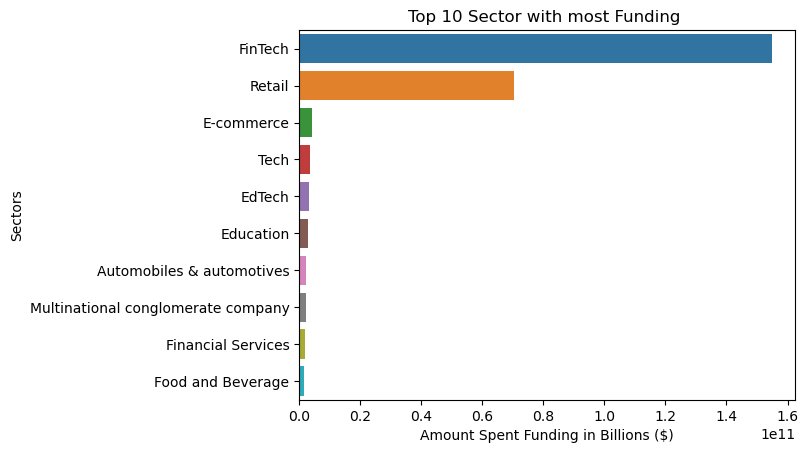

In [64]:
#Visualization of the data using a horizontal bar graph
grouping_sectors = df.groupby('Sector')['Amount'].sum().sort_values(ascending=False)
sns.barplot(y = grouping_sectors.index[:10], x = grouping_sectors.values[:10])
plt.title("Top 10 Sector with most Funding ")
plt.xlabel("Amount Spent Funding in Billions ($)")
plt.ylabel("Sectors")
plt.show()

From here we note that even though some sectors are not in the to ten sectors in value count they still receive high funding that is the Retail and the Tech sector.

## Question 2. i. What types of funding stages are available in the Indian Startup Eco-System, ii.How much funding do the top stages Provide

In [65]:
#Count the Number in each stage
df['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant', 'Debt',
       'Post-IPO Debt', 'Series H', 'Series C', 'Series E', 'Corporate',
       nan, 'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round', 'Pre-series A',
       'Series G', 'Series F', 'Pre-series', 'Pre-series C',
       'Pre-series B', 'Bridge', 'Edge', 'Series D1', 'Mid series'],
      dtype=object)

In [66]:
by_stage = df.groupby(by = "Stage").Amount.agg(["count", "sum", "mean", "median"]).sort_values(by = "sum", ascending = False)
by_stage.head(10)

,count,sum,mean,median
Stage,,,,
Debt,58,1.507248e+11,2.598703e+09,5000000.0
Series C,115,5.366694e+09,4.666690e+07,30000000.0
Series B,138,3.841332e+09,2.783574e+07,15000000.0
Series D,50,3.528002e+09,7.056004e+07,54000000.0
Series E,30,3.457477e+09,1.152492e+08,85960000.0
Series A,313,2.969238e+09,9.486383e+06,5000000.0
Series H,4,2.312500e+09,5.781250e+08,635000000.0
Private Equity,11,2.154000e+09,1.958182e+08,41900000.0
Series F,13,1.715200e+09,1.319385e+08,53000000.0


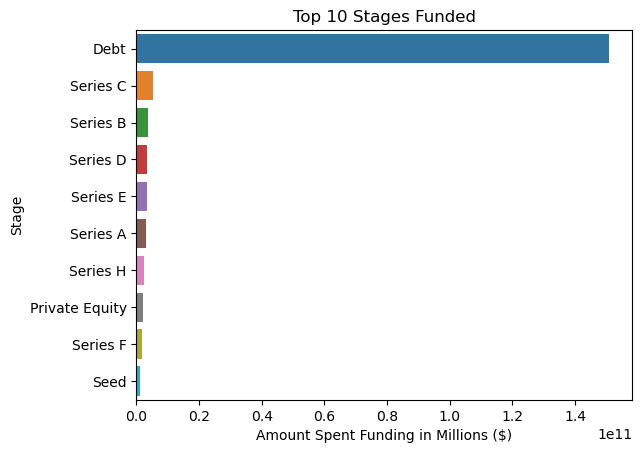

In [67]:
#Visualization of the data using a horizontal bar graph
grouping_stage = df.groupby('Stage')['Amount'].sum().sort_values(ascending=False)
sns.barplot(y = grouping_stage.index[:10], x = grouping_stage.values[:10])
plt.title("Top 10 Stages Funded")
plt.xlabel("Amount Spent Funding in Millions ($)")
plt.ylabel("Stage")
plt.show()

## Question 3: Which top 10 Locations have the highest number of Companies and which top 10 Location received highest funding?

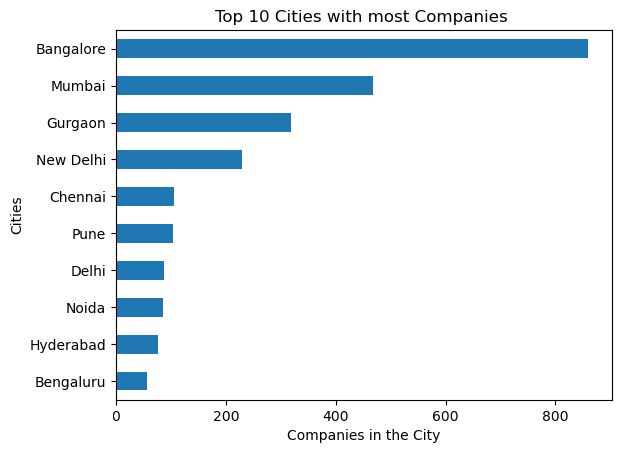

In [68]:
#Visualization of the data using a horizontal bar graph
headquarter = df['HeadQuarter'].value_counts()
headquarter.head(10).sort_values().plot.barh()
plt.title("Top 10 Cities with most Companies ")
plt.xlabel("Companies in the City")
plt.ylabel("Cities")
plt.show()

In [69]:
headquarters = df.groupby(by="HeadQuarter").Amount.agg(["count", "sum", "mean", "median"]).sort_values(by = "sum", ascending = False)
headquarters.head(10)

,count,sum,mean,median
HeadQuarter,,,,
Mumbai,468,2.306890e+11,4.929252e+08,2000000.0
Bangalore,860,2.384575e+10,2.772762e+07,2500000.0
Gurgaon,318,6.936988e+09,2.181443e+07,2700000.0
New Delhi,230,3.421521e+09,1.487618e+07,1000000.0
California,5,3.078300e+09,6.156600e+08,2000000.0
Pune,104,1.395939e+09,1.342249e+07,1000000.0
Chennai,106,1.123976e+09,1.060355e+07,2000000.0
Haryana,26,9.189850e+08,3.534558e+07,6250000.0
Delhi,88,8.273246e+08,9.401416e+06,600000.0


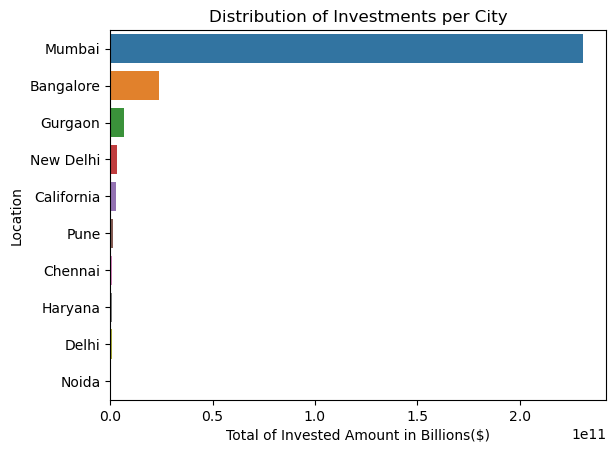

In [70]:
#Visualization of the data using a horizontal bar graph
sns.barplot(y = (headquarters.index)[:10], x = (headquarters["sum"])[:10])
plt.xlabel("Total of Invested Amount in Billions($)")
plt.ylabel("Location")
plt.title("Distribution of Investments per City")
plt.show()

This shows that the highest number of companies in a state doesn't necessary mean that they receive the highest funding, they do not corelate

## Question 4:  How much funding was distrubted across the years(in mean value) ?

In [71]:
years = df.groupby("Data Year").Amount.agg(["count", "sum", "mean", "median"]).sort_values(by = "sum", ascending = False)
years.head(10)

,count,sum,mean,median
Data Year,,,,
2021.0,1190,1.796085e+11,1.509315e+08,2500000.0
2020.0,1052,9.005808e+10,8.560654e+07,1402200.0
2018.0,525,6.641523e+09,1.265052e+07,584000.0
2019.0,89,3.336433e+09,3.748801e+07,5500000.0


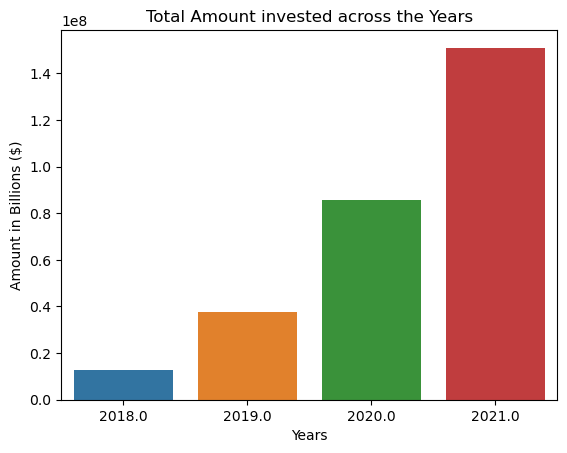

In [72]:
#Visualization of the data using a bar graph
sns.barplot(x = (years.index), y = years['mean'])
plt.xlabel("Years")
plt.ylabel("Amount in Billions ($)")
plt.title("Total Amount invested across the Years")
plt.show()

## Question 5: Is there a relationship between the sector and the funding stages ?

In [73]:
sector_stage = df.groupby(["Sector","Stage" ]).Amount.agg(["count", "sum", "mean", "median"]).sort_values(by = "count", ascending = False)
sector_stage.head(10)

count           sum          mean  \
Sector                  Stage                                             
FinTech                 Seed             43  2.061887e+08  4.795086e+06   
EdTech                  Seed             30  2.556000e+07  8.520000e+05   
Education               Seed             27  5.323323e+07  1.971601e+06   
Artificial Intelligence Seed             25  3.890450e+07  1.556180e+06   
FinTech                 Series A         23  3.565590e+08  1.550257e+07   
                        Pre-series A     22  4.723700e+07  2.147136e+06   
Software                Seed             22  1.112800e+07  5.058182e+05   
Financial Services      Seed             22  6.894250e+07  3.133750e+06   
EdTech                  Pre-series A     21  5.520000e+07  2.628571e+06   
FinTech                 Debt             19  1.501712e+11  7.903747e+09   

                                         median  
Sector                  Stage                    
FinTech                 Seed          1300000.0  
EdTech                  Seed           450000.0  
Education               Seed           200000.0  
Artificial Intelligence Seed           220000.0  
FinTech                 Series A      7000000.0  
                        Pre-series A  1150000.0  
Software                Seed           225000.0  
Financial Services      Seed          1350000.0  
EdTech                  Pre-series A  1000000.0  
FinTech                 Debt          6000000.0